In [21]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [22]:
def empty_store(s):
    return 'none' if len(s) == 0 else s
    
local = pd.read_csv('local_docker_0aa9ec8.csv',\
                    converters={'store': empty_store }, \
                    names=['source','store','iter','bufsize','nsec','bytes'])

In [4]:
http = local[ local.source == 'http' ]
print(http)

    source   store   iter  bufsize     nsec   bytes
0     http    none    100       32   143831    32.0
1     http    none    100       32   125941    32.0
2     http    none    100       32   121913    32.0
3     http    none    100       32   175081    32.0
4     http    none    100       32   134829    32.0
5     http    none    100       32   150855    32.0
6     http    none    100       32   143289    32.0
7     http    none    100       32   290557    32.0
8     http    none    100       32   136836    32.0
9     http    none    100       32   172270    32.0
10    http    none  10000       32   104490    32.0
11    http    none  10000       32   101992    32.0
12    http    none  10000       32   104168    32.0
13    http    none  10000       32   101604    32.0
14    http    none  10000       32   101845    32.0
15    http    none  10000       32   102705    32.0
16    http    none  10000       32   104806    32.0
17    http    none  10000       32   106890    32.0
18    http  

In [5]:
grouped = http.groupby(['store','iter','bufsize'], as_index=False)

In [6]:
# for name,group in grouped:
#     print(name)
#     print(group)

In [7]:
g = grouped.aggregate( np.mean )
print(g)

     store   iter  bufsize     nsec    bytes
0     none    100       32   159540    32.00
1     none    100      128   175276   128.00
2     none    100      256   178103   256.00
3     none    100     1024   137503  1024.00
4     none    100     4096   155536  4096.00
5     none  10000       32   104613    32.00
6     none  10000      128   118695   128.00
7     none  10000      256   111086   256.00
8     none  10000     1024   104512  1024.00
9     none  10000     4096   241803  4096.00
10  sparse    100       32   140476    32.00
11  sparse    100      128   186082   128.00
12  sparse    100      256   400790   256.00
13  sparse    100     1024   513024  1024.00
14  sparse    100     4096  1304251  4096.00
15  sparse  10000       32   138890    32.00
16  sparse  10000      128   234226   127.63
17  sparse  10000      256   263078   253.74
18  sparse  10000     1024   498536   918.86
19  sparse  10000     4096  1042005  1976.31


In [36]:
sparse = g[ g.store == 'sparse' ].pivot(index='bufsize',columns='iter',values='nsec')
print(sparse)

iter       100      10000
bufsize                  
32        140476   138890
128       186082   234226
256       400790   263078
1024      513024   498536
4096     1304251  1042005


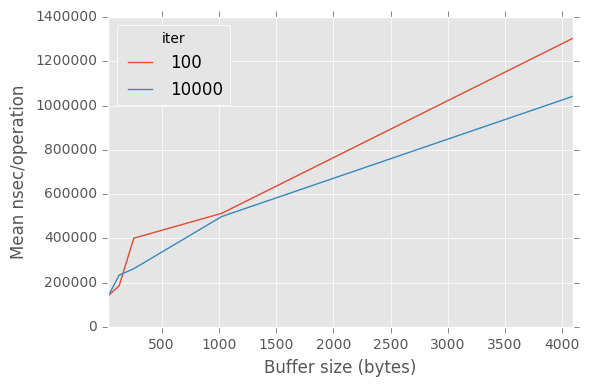

In [37]:
ax = sparse.plot()
ax.set_xlabel('Buffer size (bytes)')
ax.set_ylabel('Mean nsec/operation');